# Load libraries and directories

In [81]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import os
from itertools import cycle
lines_list = ["b-","b--","b-.","b:",]
              #"r-","r--",]#"r-.","r:",]
line = cycle(lines_list)
fn=[ 
    'box_probe.U-X',
    'box_probe.U-Y',
    #'box_probe.U-Z',
    'box_probe.UTestExp',
    'box_probe.VTestExp',
    #'box_probe.WTestExp',
    'box_probe.X',
    'box_probe.Y',
    'box_probe.Z',
    ]
#pre_directory1='/home/shaun/Desktop/DA/Create_Plots/DA_paper/Nudging/'
pre_directory2='/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging/'
#pre_directory2='/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/'
OIs = sorted(
    #[pre_directory1+f for f in os.listdir(pre_directory1) if f.startswith('C_')] + 
    [pre_directory2+f for f in os.listdir(pre_directory2) if f.startswith('C_')] 
    #['/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging/C_0.1_updated']
)
print OIs
extension='/'

['/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging/C_0', '/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging/C_0.000001', '/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging/C_0.0001', '/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging/C_0.1']


In [82]:
def read_data():
    A={}
    for dir in OIs:
        try:
            #os.chdir(dir+extension)
            #print os.getcwd()
            print dir
            Temp={}
            for fi in fn:
                print "reading ",fi.split(".")[-1]
                Temp[fi.split(".")[-1]]=np.genfromtxt(dir+extension+fi,delimiter=' ')
            A[dir]=Temp
            #os.chdir('../../')
        except:
            pass
    return A

In [83]:
def plot_data(A,node=[46,]):
    #A=read_data()
    print 'data read'
    #for Ux,Uexp in zip(['U-X','U-Y','U-Z'],['UTestExp','VTestExp','WTestExp']):
    for Ux,Uexp in zip(['U-X','U-Y'],['UTestExp','VTestExp']):
        #for i,v in enumerate(nodes):
        for i,v in enumerate(node):
            fig=plt.figure(figsize=(9,4))
            line = cycle(lines_list)
            print 'node:',i,v,Ux
            for j in [1,2,3]:
                ax=plt.subplot(1,3,j)
                for dir in sorted(A.keys()):
                    ax.plot(A[dir][Ux][:,1]-A[dir][Ux][0,1],A[dir][Ux][:,v],next(line), markeredgewidth=0.0,label=Ux+' in %s'%dir.split('/')[-1])
                ax.set_title('(%.4f,%.4f,%.4f)$m$'%(A[OIs[0]]['X'][v],A[OIs[0]]['Y'][v],A[OIs[0]]['Z'][v]))
                print 'x,y,z=',A[OIs[0]]['X'][v],A[OIs[0]]['Y'][v],A[OIs[0]]['Z'][v]
                ax.set_xlabel(r'$t$',fontsize=24)
                ax.set_ylabel(r'$'+Ux+'$',fontsize=24)
                # find and plot longest simulation time
                key_longest=OIs[0]
                for dir in OIs:
                    if len(A[dir][Ux][:,1])>=len(A[key_longest][Ux][:,1]):
                        key_longest=dir
                key_longest=dir # reset key_longest for plotting fix

                ax.plot( 
                        A[key_longest][Uexp][::20,1]-A[key_longest][Uexp][0,1],
                        A[key_longest][Uexp][::20,v],
                        'k.', 
                        markeredgewidth=0.0,
                        label='Exp')
                #plt.savefig('Nudge_node'+str(v)+Ux+'.png', transparent=True, bbox_inches='tight',)
                if j==2:
                    if Ux=='U-X':
                        plt.axis([0.01,0.015,0,4])
                    else:
                        plt.axis([0.01,0.015,-2,2])
                elif j==3:
                    #plt.savefig('Nudge_node'+str(v)+Ux+'zoomed.png', transparent=True, bbox_inches='tight',)
                    ax.legend(loc='center',framealpha=1)
                    ax.axis('off')
                    #plt.savefig('Nudge_node'+str(v)+Ux+'legend.png', transparent=True, bbox_inches='tight',)
            plt.tight_layout()

# Read data (run once)

In [84]:
A=read_data()

/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging/C_0
reading  U-X
reading  U-Y
reading  UTestExp
reading  VTestExp
reading  X
reading  Y
reading  Z
/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging/C_0.000001
reading  U-X
reading  U-Y
reading  UTestExp
reading  VTestExp
reading  X
reading  Y
reading  Z
/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging/C_0.0001
reading  U-X
reading  U-Y
reading  UTestExp
reading  VTestExp
reading  X
reading  Y
reading  Z
/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/Nudging/C_0.1
reading  U-X
reading  U-Y
reading  UTestExp
reading  VTestExp
reading  X
reading  Y
reading  Z


## Plot data

data read


<IPython.core.display.Javascript object>


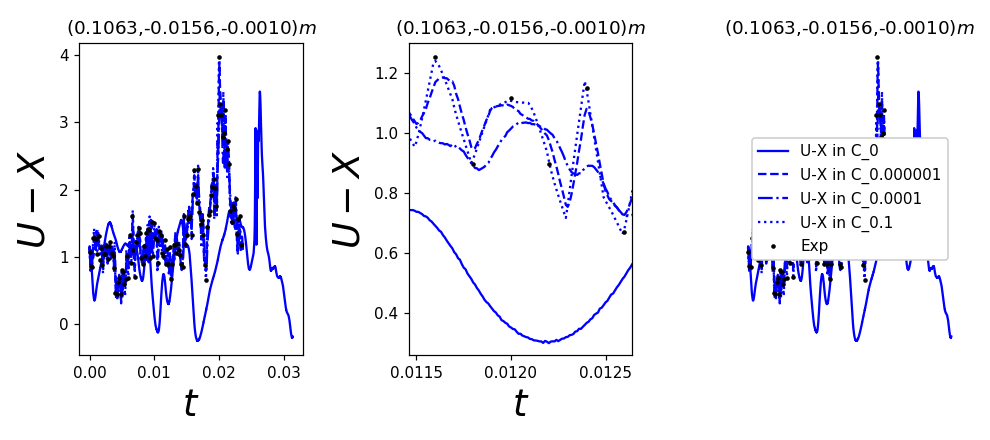

node: 0 46 U-X
x,y,z= 0.106315789474 -0.0155555555556 -0.001
x,y,z= 0.106315789474 -0.0155555555556 -0.001
x,y,z= 0.106315789474 -0.0155555555556 -0.001


<IPython.core.display.Javascript object>


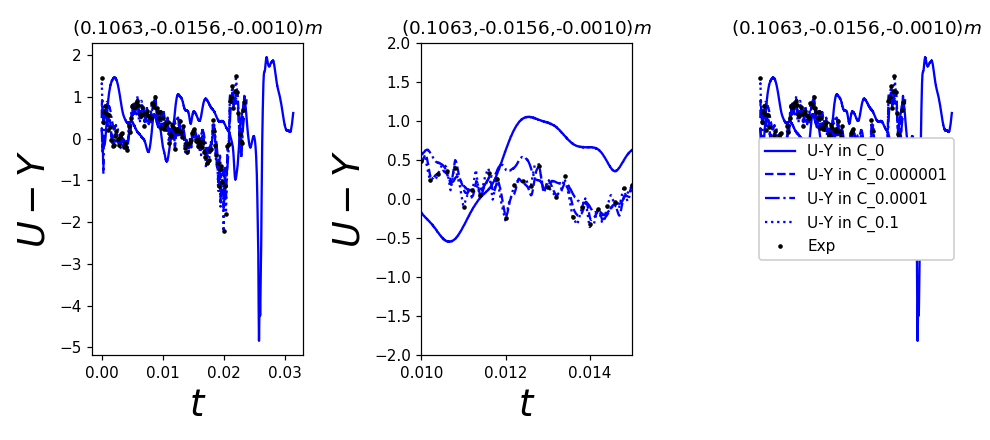

node: 0 46 U-Y
x,y,z= 0.106315789474 -0.0155555555556 -0.001
x,y,z= 0.106315789474 -0.0155555555556 -0.001
x,y,z= 0.106315789474 -0.0155555555556 -0.001


In [85]:
#plot_data(A,node=[46,48])
#plot_data(A,node=[48,])
plot_data(A,node=[46,])
plt.show()

In [49]:
print A.keys()
print OIs
print len(A.keys()),len(OIs)


['/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.1', '/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.0001', '/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0']
['/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0', '/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.0001', '/home/shaun/Desktop/DA/Create_Plots/DA_paper/Updated_BC/OI/C_0.1']
3 3


In [53]:
A[OIs[0]]['U-X'][:,1]


array([ 0.13784291,  0.13785291,  0.13786291, ...,  0.16923291,
        0.16924291,  0.16925291])

In [ ]:
A